In [1]:
import warnings
warnings.filterwarnings("ignore")
import wrangle as w
import functions as f

import pandas as pd
import numpy as np

#splits
from sklearn.model_selection import train_test_split

#visualization
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

#scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.metrics import precision_score, accuracy_score, recall_score, classification_report

#model
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn import metrics


# Acquire

In [2]:
df = pd.read_csv('merged_data.csv')


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197204 entries, 0 to 197203
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Animal ID         197204 non-null  object
 1   Name_x            152069 non-null  object
 2   DateTime_x        197204 non-null  object
 3   MonthYear_x       197204 non-null  object
 4   Date of Birth     197204 non-null  object
 5   Outcome Type      197163 non-null  object
 6   Outcome Subtype   77764 non-null   object
 7   Animal Type_x     197204 non-null  object
 8   Sex upon Outcome  197201 non-null  object
 9   Age upon Outcome  197145 non-null  object
 10  Breed_x           197204 non-null  object
 11  Color_x           197204 non-null  object
 12  Name_y            151322 non-null  object
 13  DateTime_y        196389 non-null  object
 14  MonthYear_y       196389 non-null  object
 15  Found Location    196389 non-null  object
 16  Intake Type       196389 non-null  obj

In [4]:
df, model_df = w.prep_df(df)

In [5]:
df.to_csv('animal_ad', index=False)

In [6]:
df.head()

,dob,outcome,sex,name,intake_type,condition,species,breed,outcome_age,rel_month,rel_year,primary_color,is_tabby,mix_color
0,2017-05-02,adoption,neutered male,1,owner surrender,normal,cat,mix,736,may,2019,brown,1,1
1,2017-07-12,adoption,neutered male,1,stray,normal,dog,mix,371,jul,2018,white,0,1
5,2014-03-12,transfer,intact male,1,stray,medical attention,cat,mix,6,mar,2014,orange,1,0
8,2018-03-01,adoption,neutered male,1,owner surrender,normal,dog,two breeds,797,may,2020,white,0,1
9,2022-05-04,adoption,neutered male,1,stray,normal,cat,mix,76,jul,2022,brown,1,0


In [7]:
model_df.head()

,outcome,name,is_tabby,mix_color,sex_intact male,sex_neutered male,sex_spayed female,intake_type_euthanasia request,intake_type_owner surrender,intake_type_public assist,...,primary_color_gray,primary_color_lilac point,primary_color_lynx point,primary_color_orange,primary_color_red,primary_color_sable,primary_color_seal point,primary_color_tan,primary_color_tricolor,primary_color_white
0,adoption,1,1,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,adoption,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,transfer,1,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,adoption,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
9,adoption,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
model_df.shape

(110079, 34)

df['intake_datetime'].dt.date

df['breed'][df['breed'].str.contains('mix', case=False)]

In [9]:
df.head(10)

,dob,outcome,sex,name,intake_type,condition,species,breed,outcome_age,rel_month,rel_year,primary_color,is_tabby,mix_color
0,2017-05-02,adoption,neutered male,1,owner surrender,normal,cat,mix,736,may,2019,brown,1,1
1,2017-07-12,adoption,neutered male,1,stray,normal,dog,mix,371,jul,2018,white,0,1
5,2014-03-12,transfer,intact male,1,stray,medical attention,cat,mix,6,mar,2014,orange,1,0
8,2018-03-01,adoption,neutered male,1,owner surrender,normal,dog,two breeds,797,may,2020,white,0,1
9,2022-05-04,adoption,neutered male,1,stray,normal,cat,mix,76,jul,2022,brown,1,0
10,2014-08-01,adoption,neutered male,1,stray,normal,cat,mix,78,oct,2014,black,0,0
11,2014-06-03,adoption,neutered male,1,stray,medical attention,cat,mix,63,aug,2014,white,1,1
12,2019-08-06,adoption,spayed female,1,stray,normal,dog,two breeds,744,aug,2021,black,0,1
13,2012-07-26,transfer,intact female,1,stray,normal,cat,mix,731,jul,2014,black,0,0
14,2010-01-20,adoption,neutered male,1,stray,normal,cat,mix,2559,jan,2017,gray,0,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110079 entries, 0 to 197201
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   dob            110079 non-null  datetime64[ns]
 1   outcome        110079 non-null  object        
 2   sex            110079 non-null  object        
 3   name           110079 non-null  int64         
 4   intake_type    110079 non-null  object        
 5   condition      110079 non-null  object        
 6   species        110079 non-null  object        
 7   breed          110079 non-null  object        
 8   outcome_age    110079 non-null  int64         
 9   rel_month      110079 non-null  object        
 10  rel_year       110079 non-null  object        
 11  primary_color  110079 non-null  object        
 12  is_tabby       110079 non-null  int64         
 13  mix_color      110079 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(9)
memory usa

# Prepare

pull date form 

In [11]:
#make intake and outcome datetimes into just the dates, make intake and outcome ages without times

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110079 entries, 0 to 197201
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   dob            110079 non-null  datetime64[ns]
 1   outcome        110079 non-null  object        
 2   sex            110079 non-null  object        
 3   name           110079 non-null  int64         
 4   intake_type    110079 non-null  object        
 5   condition      110079 non-null  object        
 6   species        110079 non-null  object        
 7   breed          110079 non-null  object        
 8   outcome_age    110079 non-null  int64         
 9   rel_month      110079 non-null  object        
 10  rel_year       110079 non-null  object        
 11  primary_color  110079 non-null  object        
 12  is_tabby       110079 non-null  int64         
 13  mix_color      110079 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(9)
memory usa

df['mix_breeds'] = df['breed'][df['breed'].str.contains('mix', case=False)]

df['two_breeds'] = df['breed'][df['breed'].str.contains('/', case=False)]

In [13]:
df.head()

,dob,outcome,sex,name,intake_type,condition,species,breed,outcome_age,rel_month,rel_year,primary_color,is_tabby,mix_color
0,2017-05-02,adoption,neutered male,1,owner surrender,normal,cat,mix,736,may,2019,brown,1,1
1,2017-07-12,adoption,neutered male,1,stray,normal,dog,mix,371,jul,2018,white,0,1
5,2014-03-12,transfer,intact male,1,stray,medical attention,cat,mix,6,mar,2014,orange,1,0
8,2018-03-01,adoption,neutered male,1,owner surrender,normal,dog,two breeds,797,may,2020,white,0,1
9,2022-05-04,adoption,neutered male,1,stray,normal,cat,mix,76,jul,2022,brown,1,0


In [14]:
#df['pure_breed'] = df['breed'][df['breed'].str.contains('mix|/', case=False)]

df['breed'].fillna('', inplace=True)

df['pure_bred'] = df[df['breed'].astype(str).str.contains('mix|/', case=False) == False].breed

In [15]:
counts = df['breed'].value_counts()

mask = df['breed'].isin(counts[counts > 200].index)

df = df[mask]

In [16]:
df.breed.value_counts()

mix             87490
single breed    12666
two breeds       9923
Name: breed, dtype: int64

df['mix_dummy'] = np.where(df['breed'].str.contains('mix', case=False, na=False), 1, 0)
df['two_breeds'] = np.where(df['breed'].str.contains('/', case=False, na=False), 1, 0)
df['pure_bred'] = np.where(df['breed'].isin(['/', 'mix']), 1, 0)

In [17]:
df.head(20)

,dob,outcome,sex,name,intake_type,condition,species,breed,outcome_age,rel_month,rel_year,primary_color,is_tabby,mix_color
0,2017-05-02,adoption,neutered male,1,owner surrender,normal,cat,mix,736,may,2019,brown,1,1
1,2017-07-12,adoption,neutered male,1,stray,normal,dog,mix,371,jul,2018,white,0,1
5,2014-03-12,transfer,intact male,1,stray,medical attention,cat,mix,6,mar,2014,orange,1,0
8,2018-03-01,adoption,neutered male,1,owner surrender,normal,dog,two breeds,797,may,2020,white,0,1
9,2022-05-04,adoption,neutered male,1,stray,normal,cat,mix,76,jul,2022,brown,1,0
10,2014-08-01,adoption,neutered male,1,stray,normal,cat,mix,78,oct,2014,black,0,0
11,2014-06-03,adoption,neutered male,1,stray,medical attention,cat,mix,63,aug,2014,white,1,1
12,2019-08-06,adoption,spayed female,1,stray,normal,dog,two breeds,744,aug,2021,black,0,1
13,2012-07-26,transfer,intact female,1,stray,normal,cat,mix,731,jul,2014,black,0,0
14,2010-01-20,adoption,neutered male,1,stray,normal,cat,mix,2559,jan,2017,gray,0,1


df['pure_bred'] = np.where(df['breed'].isin(['/', 'mix']), 1, 0)

In [18]:
train, validate, test = w.split_data(df, 'outcome')

train -> (66047, 14), 60.0%
validate -> (22016, 14),20.0%
test -> (22016, 14), 20.0%


In [19]:
model_df.columns

Index(['outcome', 'name', 'is_tabby', 'mix_color', 'sex_intact male',
       'sex_neutered male', 'sex_spayed female',
       'intake_type_euthanasia request', 'intake_type_owner surrender',
       'intake_type_public assist', 'intake_type_stray', 'condition_injured',
       'condition_medical attention', 'condition_mental', 'condition_normal',
       'condition_sick', 'species_dog', 'breed_single breed',
       'breed_two breeds', 'primary_color_black', 'primary_color_brown',
       'primary_color_buff', 'primary_color_fawn', 'primary_color_gold',
       'primary_color_gray', 'primary_color_lilac point',
       'primary_color_lynx point', 'primary_color_orange', 'primary_color_red',
       'primary_color_sable', 'primary_color_seal point', 'primary_color_tan',
       'primary_color_tricolor', 'primary_color_white'],
      dtype='object')

# Question and Hypothesis Statement

Does age affect outcome?

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110079 entries, 0 to 197201
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   dob            110079 non-null  datetime64[ns]
 1   outcome        110079 non-null  object        
 2   sex            110079 non-null  object        
 3   name           110079 non-null  int64         
 4   intake_type    110079 non-null  object        
 5   condition      110079 non-null  object        
 6   species        110079 non-null  object        
 7   breed          110079 non-null  object        
 8   outcome_age    110079 non-null  int64         
 9   rel_month      110079 non-null  object        
 10  rel_year       110079 non-null  object        
 11  primary_color  110079 non-null  object        
 12  is_tabby       110079 non-null  int64         
 13  mix_color      110079 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(9)
memory usa

In [21]:
from scipy import stats

In [22]:
model_df.head()

,outcome,name,is_tabby,mix_color,sex_intact male,sex_neutered male,sex_spayed female,intake_type_euthanasia request,intake_type_owner surrender,intake_type_public assist,...,primary_color_gray,primary_color_lilac point,primary_color_lynx point,primary_color_orange,primary_color_red,primary_color_sable,primary_color_seal point,primary_color_tan,primary_color_tricolor,primary_color_white
0,adoption,1,1,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,adoption,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,transfer,1,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,adoption,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
9,adoption,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


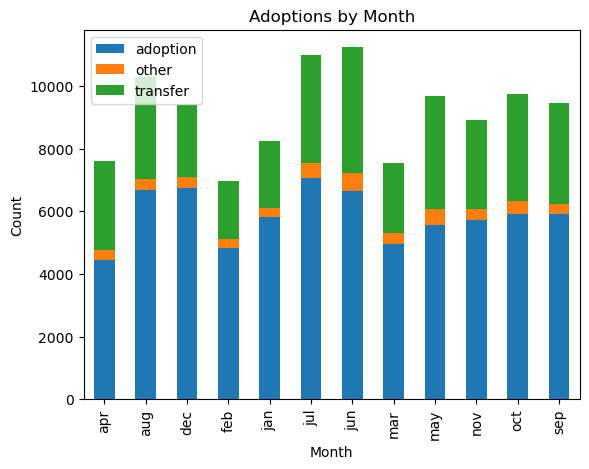

In [23]:
# Group the data by month and AdoptionStatus, and count the occurrences
grouped = df.groupby(['rel_month', 'outcome']).size().unstack()

# Create a stacked bar plot
grouped.plot(kind='bar', stacked=True)

# Set the plot title and labels
plt.title('Adoptions by Month')
plt.xlabel('Month')
plt.ylabel('Count')

# Show the legend
plt.legend()

# Display the plot
plt.show()

In [24]:
observed = pd.crosstab(df.rel_month, df.outcome)
observed
chi2, p, degf, expected = stats.chi2_contingency(observed)
#print(f'p is is less than alpha at {p} therefore the relationship is significant')



In [25]:
observed = pd.crosstab(df.rel_month, df.outcome)
observed

outcome,adoption,other,transfer
rel_month,,,
apr,4444,317,2844
aug,6690,354,3260
dec,6758,345,2282
feb,4834,282,1852
jan,5826,288,2143
jul,7052,482,3454
jun,6638,583,4015
mar,4954,340,2248
may,5580,490,3628


In [26]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
chi2, p, degf

(1021.525793113249, 5.122627700552269e-202, 22)

In [27]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110079 entries, 0 to 197201
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   outcome                         110079 non-null  object
 1   name                            110079 non-null  int64 
 2   is_tabby                        110079 non-null  int64 
 3   mix_color                       110079 non-null  int64 
 4   sex_intact male                 110079 non-null  uint8 
 5   sex_neutered male               110079 non-null  uint8 
 6   sex_spayed female               110079 non-null  uint8 
 7   intake_type_euthanasia request  110079 non-null  uint8 
 8   intake_type_owner surrender     110079 non-null  uint8 
 9   intake_type_public assist       110079 non-null  uint8 
 10  intake_type_stray               110079 non-null  uint8 
 11  condition_injured               110079 non-null  uint8 
 12  condition_medical attention   

In [28]:
model_df.head()

,outcome,name,is_tabby,mix_color,sex_intact male,sex_neutered male,sex_spayed female,intake_type_euthanasia request,intake_type_owner surrender,intake_type_public assist,...,primary_color_gray,primary_color_lilac point,primary_color_lynx point,primary_color_orange,primary_color_red,primary_color_sable,primary_color_seal point,primary_color_tan,primary_color_tricolor,primary_color_white
0,adoption,1,1,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,adoption,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,transfer,1,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,adoption,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
9,adoption,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Conclusion

f.get_models()

# Question and Hypothesis Statement

# Conclusion

# Question and Hypothesis Statement

# Conclusion

In [29]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    #'SVM': SVC()
}


param_grid = {
    'Logistic Regression': {'model__C': [0.1, 1, 10]},
    'Random Forest': {'model__n_estimators': [100, 200, 300]},
    'SVM': {'model__C': [0.1, 1, 10], 'model__kernel': ['linear', 'rbf']}
}

In [30]:
model_df.head()

,outcome,name,is_tabby,mix_color,sex_intact male,sex_neutered male,sex_spayed female,intake_type_euthanasia request,intake_type_owner surrender,intake_type_public assist,...,primary_color_gray,primary_color_lilac point,primary_color_lynx point,primary_color_orange,primary_color_red,primary_color_sable,primary_color_seal point,primary_color_tan,primary_color_tricolor,primary_color_white
0,adoption,1,1,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,adoption,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,transfer,1,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8,adoption,1,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
9,adoption,1,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
X = df.drop('outcome', axis=1)  # Verify that 'target' is the correct column name for the target variable
y = df['outcome']

In [32]:
X.shape

(110079, 13)

In [33]:
print(df.info())  # Check for missing values or inconsistent data types


<class 'pandas.core.frame.DataFrame'>
Int64Index: 110079 entries, 0 to 197201
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   dob            110079 non-null  datetime64[ns]
 1   outcome        110079 non-null  object        
 2   sex            110079 non-null  object        
 3   name           110079 non-null  int64         
 4   intake_type    110079 non-null  object        
 5   condition      110079 non-null  object        
 6   species        110079 non-null  object        
 7   breed          110079 non-null  object        
 8   outcome_age    110079 non-null  int64         
 9   rel_month      110079 non-null  object        
 10  rel_year       110079 non-null  object        
 11  primary_color  110079 non-null  object        
 12  is_tabby       110079 non-null  int64         
 13  mix_color      110079 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(9)
memory usa

In [34]:
df.isnull().sum()

dob              0
outcome          0
sex              0
name             0
intake_type      0
condition        0
species          0
breed            0
outcome_age      0
rel_month        0
rel_year         0
primary_color    0
is_tabby         0
mix_color        0
dtype: int64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
from sklearn.svm import SVC


In [38]:

# Define the classifiers to evaluate
classifiers = {
    'Random Forest': (RandomForestClassifier(), {'n_estimators': [10, 50, 100]}),
    'Decision Tree': (DecisionTreeClassifier(), {'max_depth': [None, 5, 10]}),
    'Logistic Regression': (LogisticRegression(), {'C': [0.1, 1, 10]}),
    'SVM': (SVC(), {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})
}


In [39]:
best_accuracy = 0.0
best_model = None
best_features = None
best_parameters = None
best_model_type = None

In [41]:
from itertools import combinations


In [43]:
# Iterate over all possible combinations of features
num_features = X_train.shape[1]
for k in range(1, num_features + 1):
    feature_combinations = combinations(range(num_features), k)

    for features in feature_combinations:
        X_train_selected = X_train[:, X_train]
        X_test_selected = X_test[:, X_train]

        for model_name, (model, param_grid) in classifiers.items():
            grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
            grid_search.fit(X_train_selected, y_train)

            y_pred = grid_search.predict(X_test_selected)
            accuracy = accuracy_score(y_test, y_pred)

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_model = grid_search.best_estimator_
                best_features = features
                best_parameters = grid_search.best_params_
                best_model_type = model_name

InvalidIndexError: (slice(None, None, None),               dob            sex  name      intake_type condition species  \
163220 2015-04-06  spayed female     1  owner surrender    normal     cat   
35925  2010-02-01    intact male     1  owner surrender    normal     dog   
116772 2014-01-05  spayed female     1            stray    normal     dog   
164338 2009-07-21  neutered male     1            stray    normal     dog   
29546  2015-08-20  spayed female     1            stray    normal     cat   
...           ...            ...   ...              ...       ...     ...   
100034 2021-07-04  neutered male     1  owner surrender    normal     dog   
139125 2016-06-03  intact female     1            stray    normal     cat   
187220 2018-11-17  spayed female     1    public assist    normal     cat   
1571   2015-03-28  neutered male     1            stray    normal     cat   
28551  2007-06-19  neutered male     1            stray   injured     dog   

               breed  outcome_age rel_month rel_year primary_color  is_tabby  \
163220           mix           64       jun     2015         white         0   
35925            mix         1826       feb     2015         black         0   
116772           mix         1133       feb     2017         black         0   
164338           mix         3678       aug     2019         white         0   
29546            mix           84       nov     2015         brown         1   
...              ...          ...       ...      ...           ...       ...   
100034  single breed           58       aug     2021         sable         0   
139125           mix          739       jun     2018        orange         1   
187220           mix         1109       nov     2021          gray         1   
1571             mix           83       jun     2015         brown         1   
28551            mix         2931       jun     2015         black         0   

        mix_color  
163220          1  
35925           1  
116772          1  
164338          1  
29546           0  
...           ...  
100034          1  
139125          0  
187220          0  
1571            1  
28551           1  

[88063 rows x 13 columns])

In [ ]:
# Print the best model, features, parameters, and model type
print("Best Model:", best_model)
print("Best Features:", best_features)
print("Best Parameters:", best_parameters)
print("Best Model Type:", best_model_type)